![normalize](normalize1.png)

![nor](normalize2.png)
S是方差

# 最值归一化

In [1]:
import numpy as np

In [2]:
x = np.random.randint(0, 100, size=100)

In [3]:
(x-np.min(x))/(np.max(x) - np.min(x))

array([0.70707071, 0.4040404 , 0.83838384, 0.32323232, 0.77777778,
       0.94949495, 0.68686869, 0.28282828, 0.18181818, 0.11111111,
       0.61616162, 0.84848485, 0.78787879, 0.18181818, 0.53535354,
       0.17171717, 0.01010101, 0.86868687, 0.51515152, 0.95959596,
       0.11111111, 1.        , 0.66666667, 0.8989899 , 1.        ,
       0.45454545, 0.56565657, 0.46464646, 0.39393939, 0.56565657,
       0.91919192, 0.62626263, 0.38383838, 0.41414141, 0.01010101,
       0.65656566, 0.70707071, 0.19191919, 0.72727273, 0.21212121,
       0.68686869, 0.68686869, 0.73737374, 0.57575758, 0.4040404 ,
       0.14141414, 0.42424242, 0.78787879, 0.13131313, 0.49494949,
       0.92929293, 0.65656566, 0.2020202 , 0.7979798 , 0.72727273,
       0.6969697 , 0.84848485, 0.12121212, 0.08080808, 0.07070707,
       0.82828283, 0.60606061, 0.38383838, 0.64646465, 0.32323232,
       0.91919192, 0.84848485, 0.04040404, 0.27272727, 0.7979798 ,
       0.5959596 , 0.13131313, 0.43434343, 0.53535354, 0.96969

In [4]:
X = np.random.randint(0, 100, (50,2))

In [5]:
X = np.array(X, dtype=float)

In [6]:
X[:10,:]

array([[ 5., 83.],
       [ 4., 31.],
       [60., 89.],
       [47., 48.],
       [83., 83.],
       [63., 75.],
       [64., 32.],
       [50., 31.],
       [99., 42.],
       [53., 93.]])

In [7]:
X[:, 0] = (X[:,0] - np.min(X[:,0]))/(np.max(X[:,0]) - np.min(X[:,0]))

In [8]:
X[:10, 0]

array([0.04081633, 0.03061224, 0.60204082, 0.46938776, 0.83673469,
       0.63265306, 0.64285714, 0.5       , 1.        , 0.53061224])

In [9]:
X[:, 1] = (X[:,1] - np.min(X[:,1]))/(np.max(X[:,1]) - np.min(X[:,1]))

In [10]:
import matplotlib.pyplot as plt

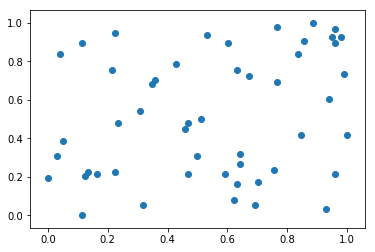

In [11]:
plt.scatter(X[:,0], X[:, 1])

In [12]:
# 均值
np.mean(X[:, 0])

0.543469387755102

In [13]:
# 方差
np.std(X[:, 0])

0.3090459718952663

# 均值方差归一化 这个更好用

In [14]:
X2 = np.random.randint(0, 100, (50,2))
X2 = np.array(X2, dtype=float)

In [15]:
X2[:, 0] = (X2[:, 0] -np.mean(X2[:, 0]))/np.std(X2[:, 0])

In [16]:
X2[:, 1] = (X2[:, 1] -np.mean(X2[:, 1]))/np.std(X2[:, 1])

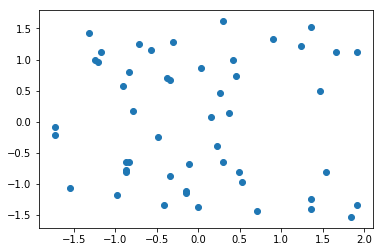

In [17]:
plt.scatter(X2[:,0], X2[:, 1])

In [18]:
np.mean(X2[:, 0])

-3.3306690738754695e-18

In [19]:
np.mean(X2[:, 1])

-6.661338147750939e-17

In [20]:
np.std(X2[:, 0])

0.9999999999999999

# 对测试数据集如何归一化?

![testnormal](testnormalize.png)

# Scaler

In [21]:
from sklearn import datasets

In [22]:
iris = datasets.load_iris()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=666)

## StandardScaler


$$
newx = (x - X_{mean})/X_{scale}
$$

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
standardScaler = StandardScaler()

In [26]:
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
# 均值
standardScaler.mean_

array([5.83416667, 3.0825    , 3.70916667, 1.16916667])

In [28]:
X_train[:2, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [31]:
# 这里是方差
standardScaler.scale_

array([0.81019502, 0.44076874, 1.76295187, 0.75429833])

In [32]:
standardScaler.transform(X_train)

array([[-0.90616043,  0.94720873, -1.30982967, -1.28485856],
       [-1.15301457, -0.18717298, -1.30982967, -1.28485856],
       [-0.16559799, -0.64092567,  0.22169257,  0.17345038],
       [ 0.45153738,  0.72033239,  0.95909217,  1.49918578],
       [-0.90616043, -1.3215547 , -0.40226093, -0.0916967 ],
       [ 1.43895396,  0.2665797 ,  0.56203085,  0.30602392],
       [ 0.3281103 , -1.09467835,  1.07253826,  0.30602392],
       [ 2.1795164 , -0.18717298,  1.63976872,  1.2340387 ],
       [-0.78273335,  2.30846679, -1.25310662, -1.4174321 ],
       [ 0.45153738, -2.00218372,  0.44858475,  0.43859746],
       [ 1.80923518, -0.41404933,  1.46959958,  0.83631808],
       [ 0.69839152,  0.2665797 ,  0.90236912,  1.49918578],
       [ 0.20468323,  0.72033239,  0.44858475,  0.571171  ],
       [-0.78273335, -0.86780201,  0.10824648,  0.30602392],
       [-0.53587921,  1.40096142, -1.25310662, -1.28485856],
       [-0.65930628,  1.40096142, -1.25310662, -1.28485856],
       [-1.0295875 ,  0.

In [33]:
X_train = standardScaler.transform(X_train)

In [34]:
X_train

array([[-0.90616043,  0.94720873, -1.30982967, -1.28485856],
       [-1.15301457, -0.18717298, -1.30982967, -1.28485856],
       [-0.16559799, -0.64092567,  0.22169257,  0.17345038],
       [ 0.45153738,  0.72033239,  0.95909217,  1.49918578],
       [-0.90616043, -1.3215547 , -0.40226093, -0.0916967 ],
       [ 1.43895396,  0.2665797 ,  0.56203085,  0.30602392],
       [ 0.3281103 , -1.09467835,  1.07253826,  0.30602392],
       [ 2.1795164 , -0.18717298,  1.63976872,  1.2340387 ],
       [-0.78273335,  2.30846679, -1.25310662, -1.4174321 ],
       [ 0.45153738, -2.00218372,  0.44858475,  0.43859746],
       [ 1.80923518, -0.41404933,  1.46959958,  0.83631808],
       [ 0.69839152,  0.2665797 ,  0.90236912,  1.49918578],
       [ 0.20468323,  0.72033239,  0.44858475,  0.571171  ],
       [-0.78273335, -0.86780201,  0.10824648,  0.30602392],
       [-0.53587921,  1.40096142, -1.25310662, -1.28485856],
       [-0.65930628,  1.40096142, -1.25310662, -1.28485856],
       [-1.0295875 ,  0.

In [35]:
X_test_std = standardScaler.transform(X_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors =3)

In [38]:
# KNeighborsClassifier?

In [40]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [42]:
knn_clf.score(X_test_std, y_test)

1.0

In [43]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=666)

In [47]:
X_train_std = min_max_scaler.fit_transform(X_train)
X_test_std = min_max_scaler.fit_transform(X_test)

In [48]:
knn_clf.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [49]:
knn_clf.score(X_test_std, y_test)

1.0